This is the notebook to begin to explore the characteristics of the day_approach data.

*This is the data source: https://dataverse.nl/dataset.xhtml?persistentId=doi:10.34894/UWU9PV*

*This is the paper where the dataset comes from: https://journals.humankinetics.com/view/journals/ijspp/16/10/article-p1522.xml*. Will be referred to as [1].

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

In [3]:
# Load data
df = pd.read_csv('data/day_approach_maskedID_timeseries.csv')

# Basic information
print("====== Shape of data: ====== ")
print(df.shape)

print("====== Data columns: ====== ")
print(df.columns)


====== Shape of data: ====== 
(42766, 73)
====== Data columns: ====== 
Index(['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting',
       'strength training', 'hours alternative', 'perceived exertion',
       'perceived trainingSuccess', 'perceived recovery', 'nr. sessions.1',
       'total km.1', 'km Z3-4.1', 'km Z5-T1-T2.1', 'km sprinting.1',
       'strength training.1', 'hours alternative.1', 'perceived exertion.1',
       'perceived trainingSuccess.1', 'perceived recovery.1', 'nr. sessions.2',
       'total km.2', 'km Z3-4.2', 'km Z5-T1-T2.2', 'km sprinting.2',
       'strength training.2', 'hours alternative.2', 'perceived exertion.2',
       'perceived trainingSuccess.2', 'perceived recovery.2', 'nr. sessions.3',
       'total km.3', 'km Z3-4.3', 'km Z5-T1-T2.3', 'km sprinting.3',
       'strength training.3', 'hours alternative.3', 'perceived exertion.3',
       'perceived trainingSuccess.3', 'perceived recovery.3', 'nr. sessions.4',
       'total km.4', 'km Z3

In [4]:
print("====== Data types: ====== ")
print(df.dtypes)

print("====== Head of data: ====== ")
print(df.head())

====== Data types: ====== 
nr. sessions                   float64
total km                       float64
km Z3-4                        float64
km Z5-T1-T2                    float64
km sprinting                   float64
                                ...   
perceived trainingSuccess.6    float64
perceived recovery.6           float64
Athlete ID                       int64
injury                           int64
Date                             int64
Length: 73, dtype: object
====== Head of data: ====== 
   nr. sessions  total km  km Z3-4  km Z5-T1-T2  km sprinting  \
0           1.0       5.8      0.0          0.6           1.2   
1           0.0       0.0      0.0          0.0           0.0   
2           1.0       0.0      0.0          0.0           0.0   
3           0.0       0.0      0.0          0.0           0.0   
4           1.0       0.0      0.0          0.0           0.0   

   strength training  hours alternative  perceived exertion  \
0                0.0               

In [5]:
print("====== Null values: ====== ")
print(df.isnull().sum)

====== Null values: ====== 
<bound method DataFrame.sum of        nr. sessions  total km  km Z3-4  km Z5-T1-T2  km sprinting  \
0             False     False    False        False         False   
1             False     False    False        False         False   
2             False     False    False        False         False   
3             False     False    False        False         False   
4             False     False    False        False         False   
...             ...       ...      ...          ...           ...   
42761         False     False    False        False         False   
42762         False     False    False        False         False   
42763         False     False    False        False         False   
42764         False     False    False        False         False   
42765         False     False    False        False         False   

       strength training  hours alternative  perceived exertion  \
0                  False              False  

The figure below comes from [1]. This is how the structure of the data relates to time. The labels of "day" corresponse to the label suffix within the data. 
For example, `nr.sessions.1` is the number of training sessions that took place for that athelte on Day 1. 

![Figure 1](figs/day_week_time_data.png)

## Feature Descriptions (Per Day)

Each row in the dataset represents a single day of data for a specific athlete. Features are repeated across multiple days (e.g., `feature`, `feature.1`, ..., `feature.6`), where:

- `feature` = Day 0 (most recent)
- `feature.1` = Day -1 (1 day ago)
- ...
- `feature.6` = Day -6 (6 days ago)

Below are descriptions of the base features (i.e., for Day 0):
| **CSV Column**              | **Paper Feature Name**            | **Description**                              |
| --------------------------- | --------------------------------- | -------------------------------------------- |
| `nr. sessions`              | Number of sessions                | Total training sessions that day             |
| `total km`                  | Total distance                    | Total kilometers run                         |
| `km Z3-4`                   | Sum of distance in Z3–Z4          | Distance in heart-rate zones Z3–Z4           |
| `km Z5-T1-T2`               | Sum of distance in Z5, T1, and T2 | Distance in high-intensity or interval zones |
| `km sprinting`              | Distance sprinting                | Distance run while sprinting                 |
| `strength training`         | Number of strength sessions       | Strength training sessions that day          |
| `hours alternative`         | Hours alternative training        | Hours spent on non-running activities        |
| `perceived exertion`        | Perceived exertion                | Subjective exertion rating (0–1)             |
| `perceived trainingSuccess` | Perceived training success        | Subjective rating of training quality        |
| `perceived recovery`        | Perceived recovery                | Subjective recovery rating (0–1)             |

> Note: Each of the above features appears for 7 consecutive days per row, enabling time-series modeling or temporal feature engineering.


### Summary Stats & Class Balance

                               count         mean         std   min     25%  \
nr. sessions                 42766.0     0.829561    0.580696  0.00    0.00   
total km                     42766.0     7.038187    7.473216  0.00    0.00   
km Z3-4                      42766.0     0.691381    2.317657  0.00    0.00   
km Z5-T1-T2                  42766.0     0.579930    1.811938  0.00    0.00   
km sprinting                 42766.0     0.073016    0.483480  0.00    0.00   
...                              ...          ...         ...   ...     ...   
perceived trainingSuccess.6  42766.0     0.349503    0.368042 -0.01   -0.01   
perceived recovery.6         42766.0     0.196224    0.190568 -0.01   -0.01   
Athlete ID                   42766.0    34.550858   19.050033  0.00   20.00   
injury                       42766.0     0.013632    0.115960  0.00    0.00   
Date                         42766.0  1228.039892  807.021168  0.00  436.00   

                                 50%      75%     m

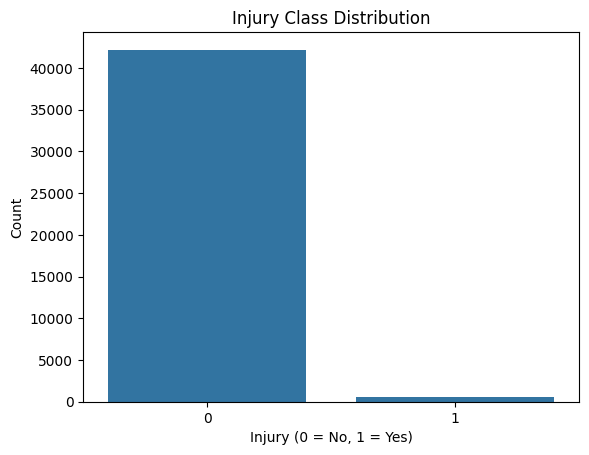

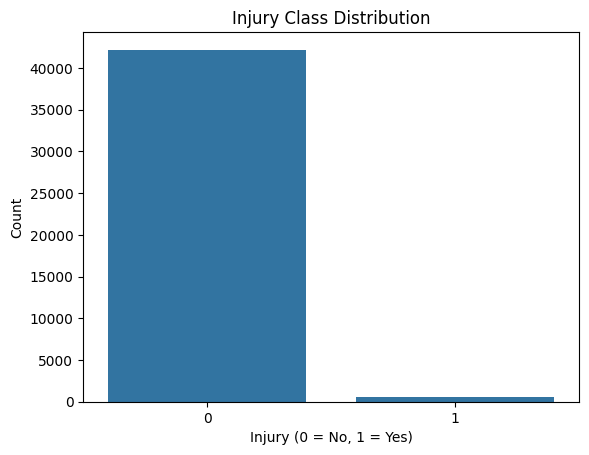

In [6]:
# Summary statistics
summary = df.describe().T
print(summary)

# Class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='injury', data=df)
plt.title('Injury Class Distribution')
plt.xlabel('Injury (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

sns.countplot(x='injury', data=df)
plt.title('Injury Class Distribution')
plt.xlabel('Injury (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


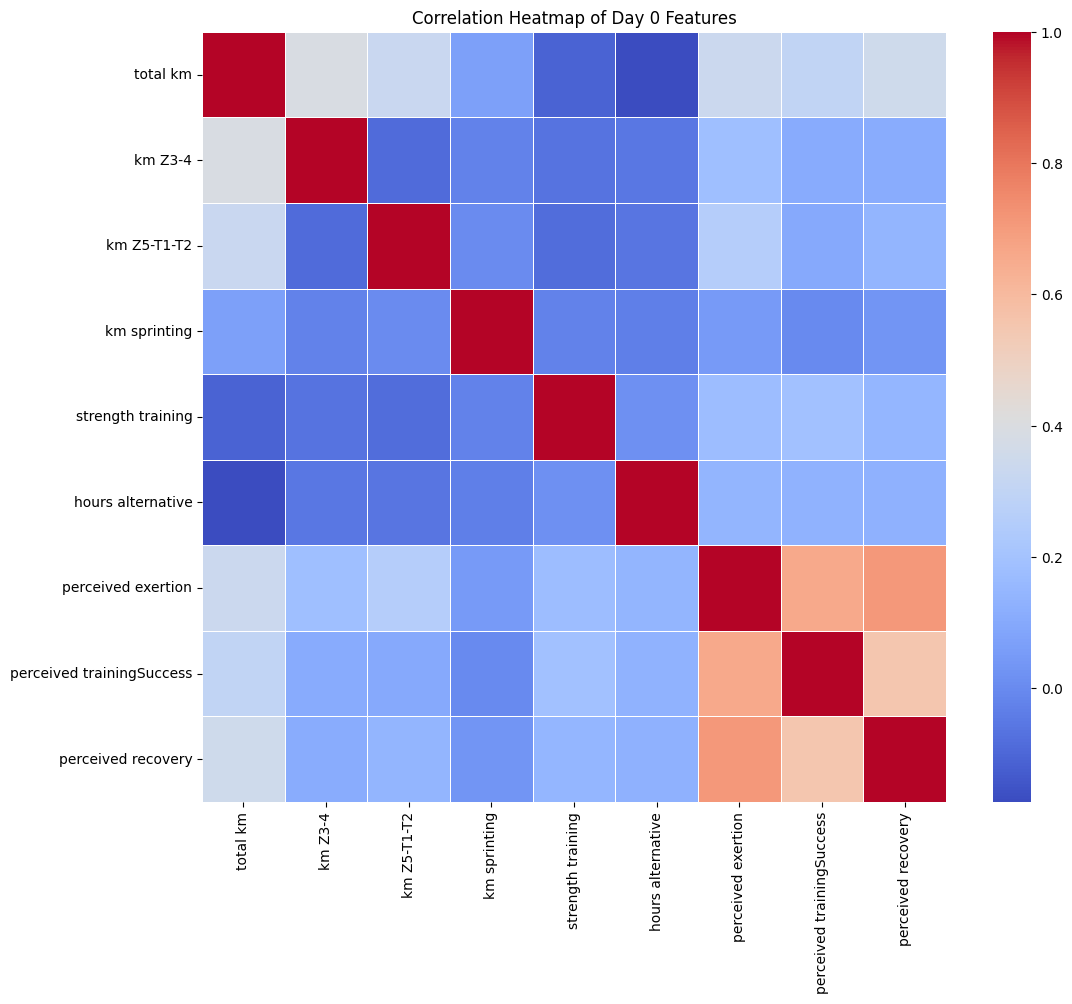

In [7]:
# Extract day 0 features (no dot in the name)
day0_cols = [col for col in df.columns if '.' not in col and col not in ['Athlete ID', 'injury', 'Date']]
day0_corr = df[day0_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(day0_corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Day 0 Features")
plt.show()


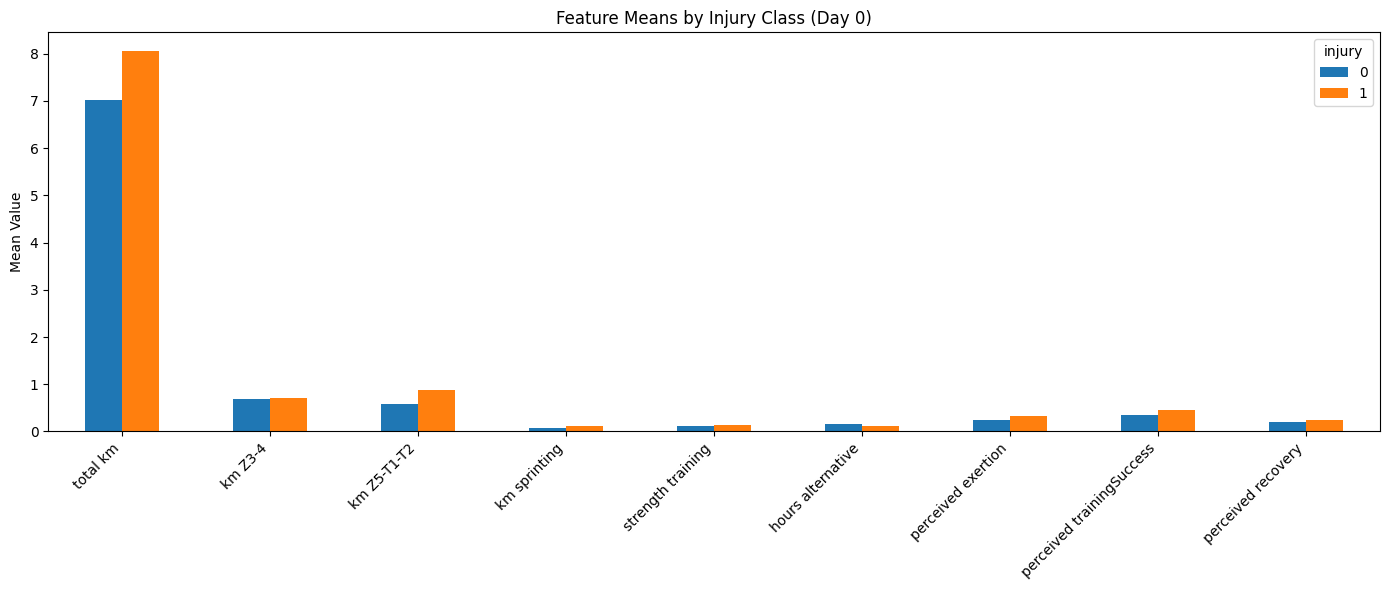

In [8]:
import numpy as np

# Group by injury
grouped = df.groupby('injury')[day0_cols]

# Mean comparison
mean_comparison = grouped.mean().T
mean_comparison.plot(kind='bar', figsize=(14, 6))
plt.title('Feature Means by Injury Class (Day 0)')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


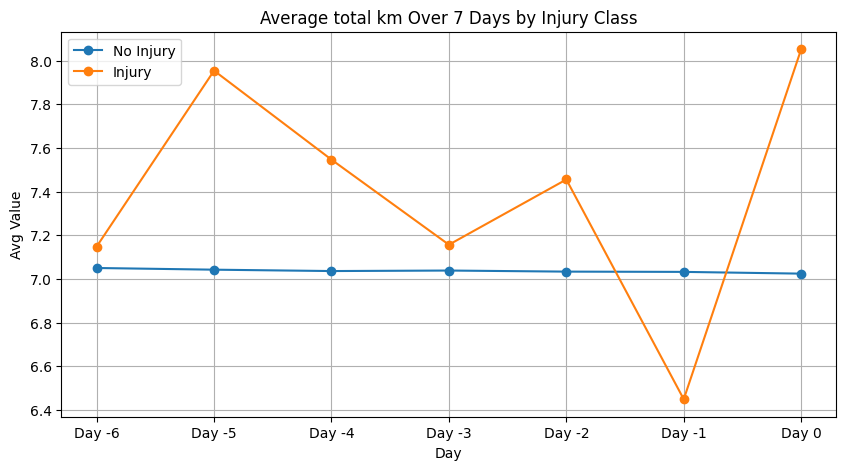

In [9]:
# Pick one feature to plot over 7 days
feature_base = 'total km'
feature_cols = [feature_base] + [f'{feature_base}.{i}' for i in range(1, 7)]

# Calculate average per injury class
means_over_time = df.groupby('injury')[feature_cols].mean().T
means_over_time.columns = ['No Injury', 'Injury']
means_over_time.index = ['Day 0'] + [f'Day -{i}' for i in range(1, 7)]

means_over_time.plot(marker='o', figsize=(10, 5))
plt.title(f'Average {feature_base} Over 7 Days by Injury Class')
plt.ylabel('Avg Value')
plt.xlabel('Day')
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()


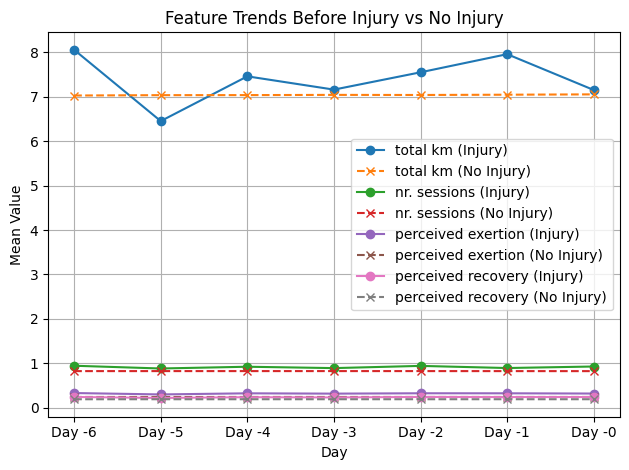

In [10]:

features_to_plot = ['total km', 'nr. sessions', 'perceived exertion', 'perceived recovery']
for feature in features_to_plot:
    days = [f"{feature}" if i == 0 else f"{feature}.{i}" for i in range(7)]
    df_injured = df[df['injury'] == 1][days].mean()
    df_healthy = df[df['injury'] == 0][days].mean()
    df_injured.index = df_healthy.index = [f'Day -{i}' for i in range(7)][::-1]
    plt.plot(df_injured.index, df_injured.values, marker='o', label=f'{feature} (Injury)')
    plt.plot(df_healthy.index, df_healthy.values, marker='x', linestyle='--', label=f'{feature} (No Injury)')
plt.title('Feature Trends Before Injury vs No Injury')
plt.xlabel('Day')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


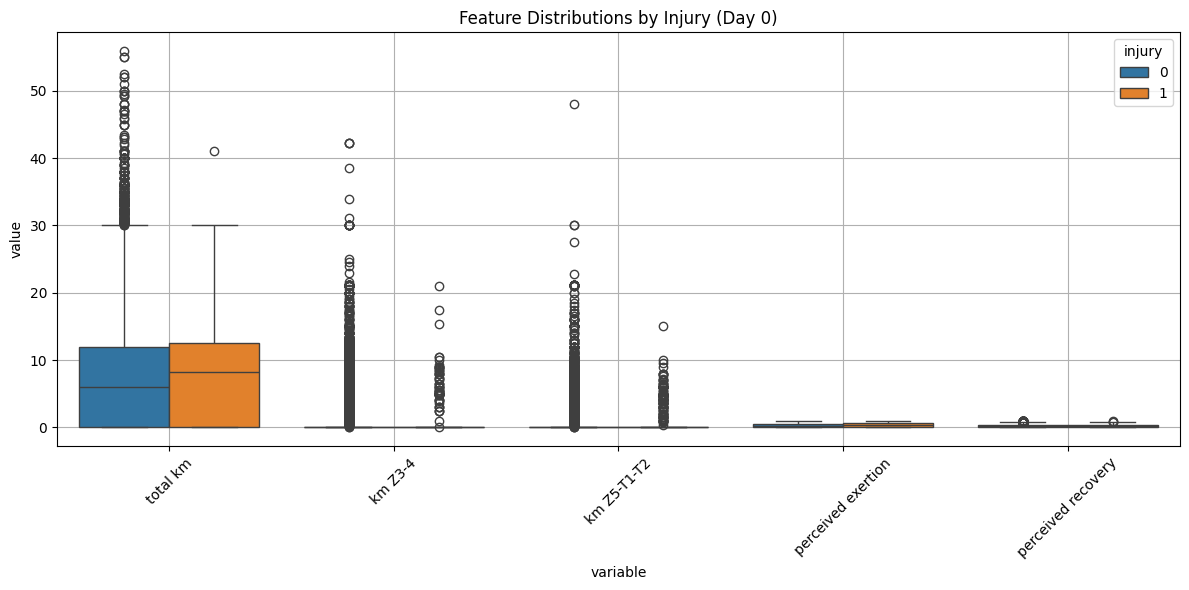

In [11]:

features = ['total km', 'km Z3-4', 'km Z5-T1-T2', 'perceived exertion', 'perceived recovery']
df_melted = df[['injury'] + features].melt(id_vars='injury')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='variable', y='value', hue='injury')
plt.title('Feature Distributions by Injury (Day 0)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [12]:

athlete_stats = df.groupby('Athlete ID').agg({
    'injury': 'mean',
    'total km': ['mean', 'std'],
    'perceived exertion': ['mean', 'std']
})
athlete_stats.columns = ['injury_rate', 'km_mean', 'km_std', 'exertion_mean', 'exertion_std']
athlete_stats.sort_values('injury_rate', ascending=False)



,injury_rate,km_mean,km_std,exertion_mean,exertion_std
Athlete ID,,,,,
29,0.045205,5.383699,4.937621,0.212753,0.231519
42,0.043011,4.732796,4.895431,0.344180,0.309902
26,0.039593,3.022964,4.671821,0.307036,0.315599
36,0.034483,4.516458,5.433251,0.290580,0.290491
68,0.034043,4.329787,6.310719,0.287915,0.328067
...,...,...,...,...,...
46,0.000000,10.265441,6.934048,0.384669,0.224099
62,0.000000,5.203571,5.169708,0.240867,0.250507
60,0.000000,2.200000,3.437122,0.199070,0.279172


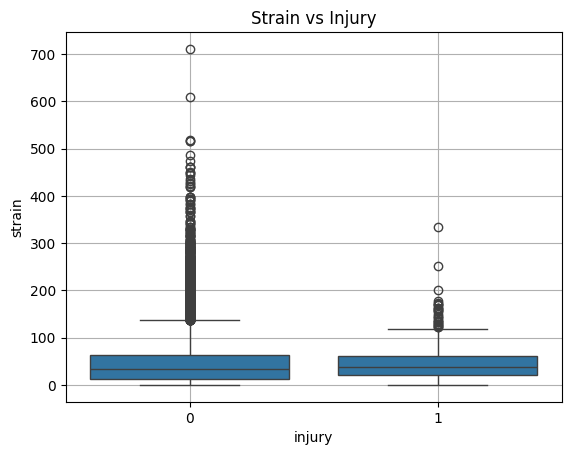

In [13]:

km_cols = [f'total km' if i == 0 else f'total km.{i}' for i in range(7)]
df['monotony'] = df[km_cols].std(axis=1)
df['strain'] = df[km_cols].mean(axis=1) * df['monotony']
sns.boxplot(x='injury', y='strain', data=df)
plt.title('Strain vs Injury')
plt.grid(True)
plt.show()

/tmp/ipykernel_139352/3282005689.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


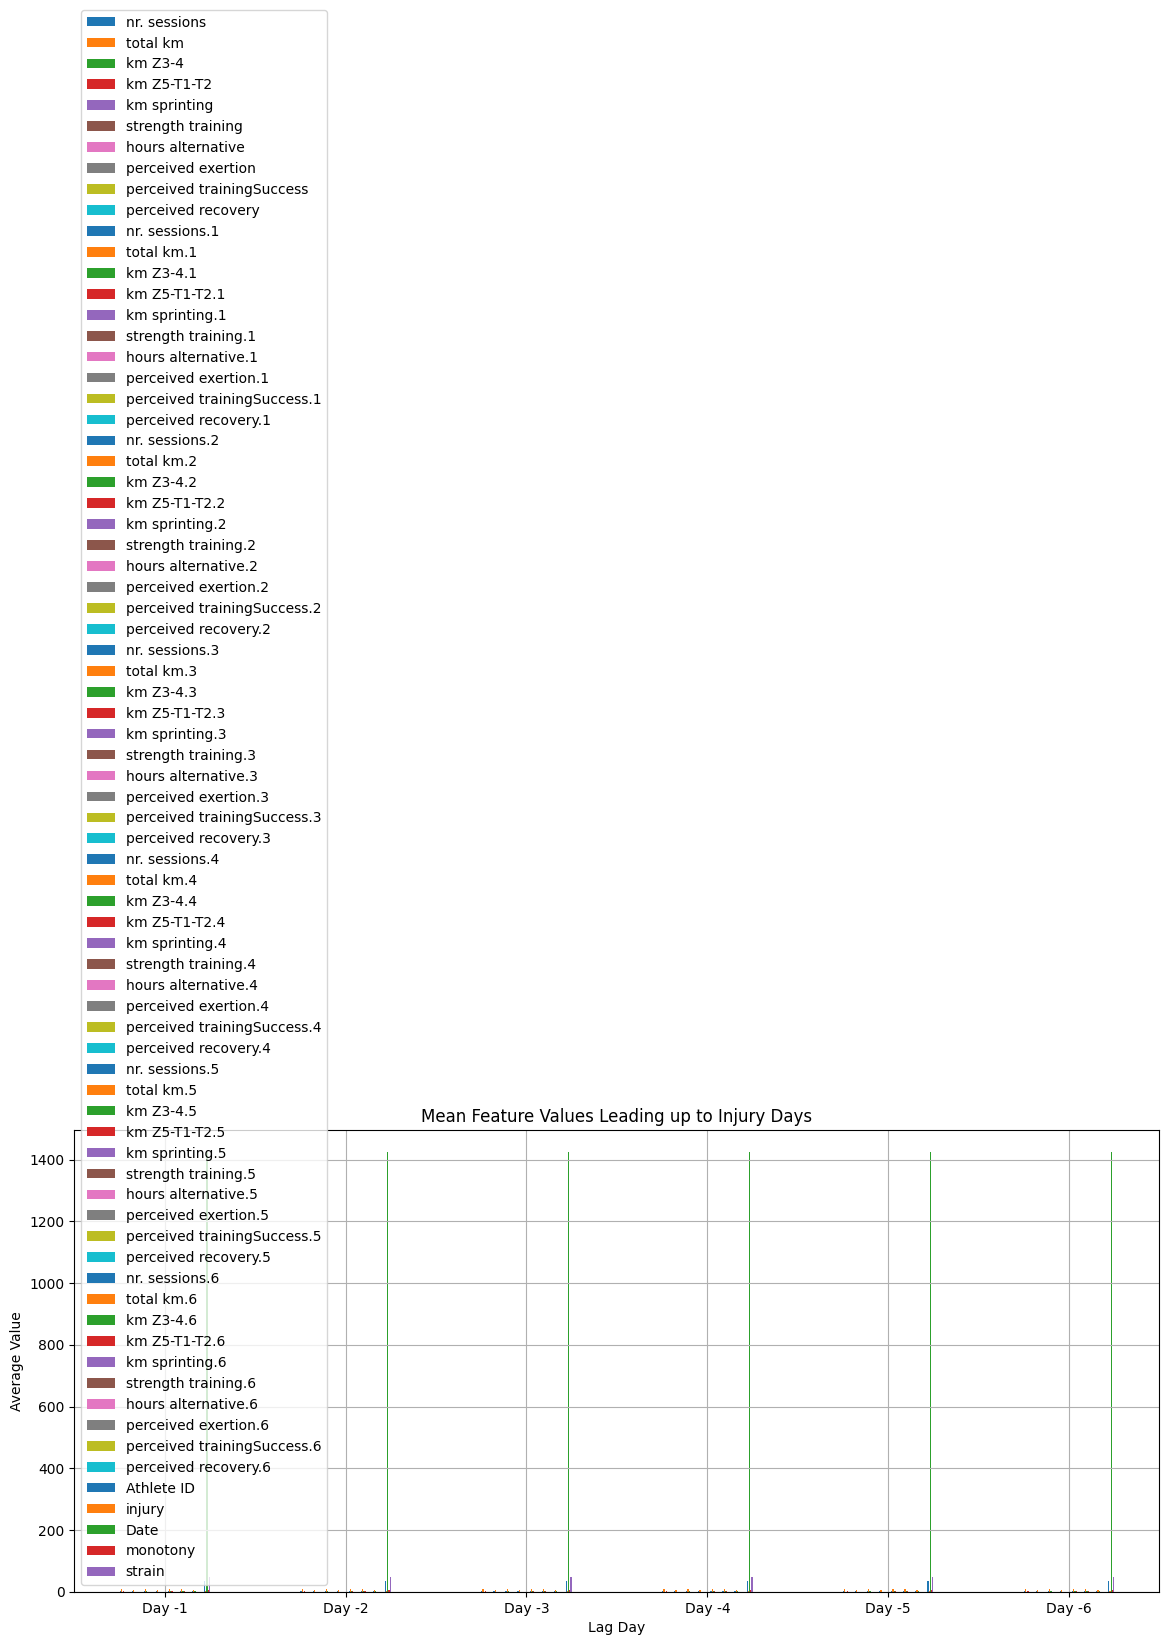

In [15]:
injury_indices = df[df['injury'] == 1].index
lags = range(1, 7)

lagged_means = {}
for lag in lags:
    valid_indices = [i for i in injury_indices if i - lag >= 0]
    lagged_frames = [df.iloc[i - lag:i] for i in valid_indices]
    lagged_df = pd.concat(lagged_frames)
    lagged_means[f'Day -{lag}'] = lagged_df.mean()

injury_lagged = pd.DataFrame(lagged_means).T
injury_lagged.plot(kind='bar', figsize=(14, 6))
plt.title("Mean Feature Values Leading up to Injury Days")
plt.ylabel("Average Value")
plt.xlabel("Lag Day")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

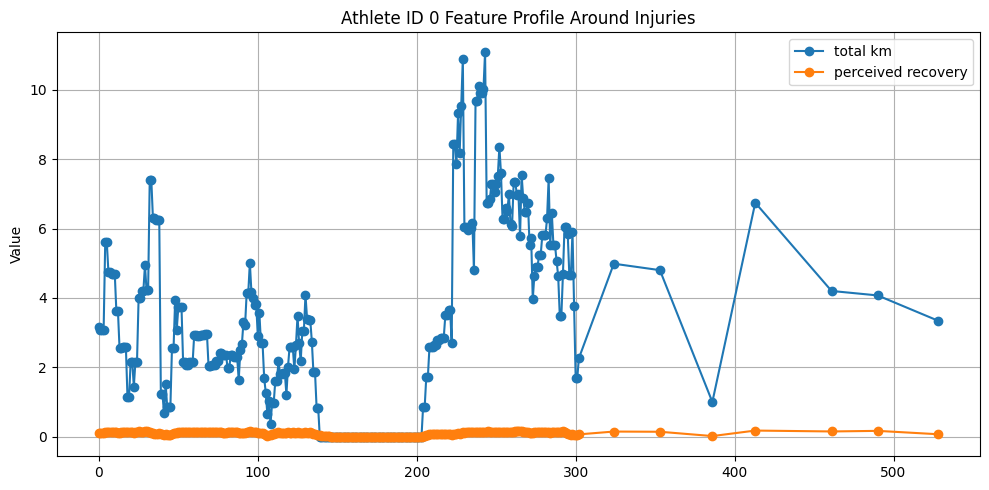

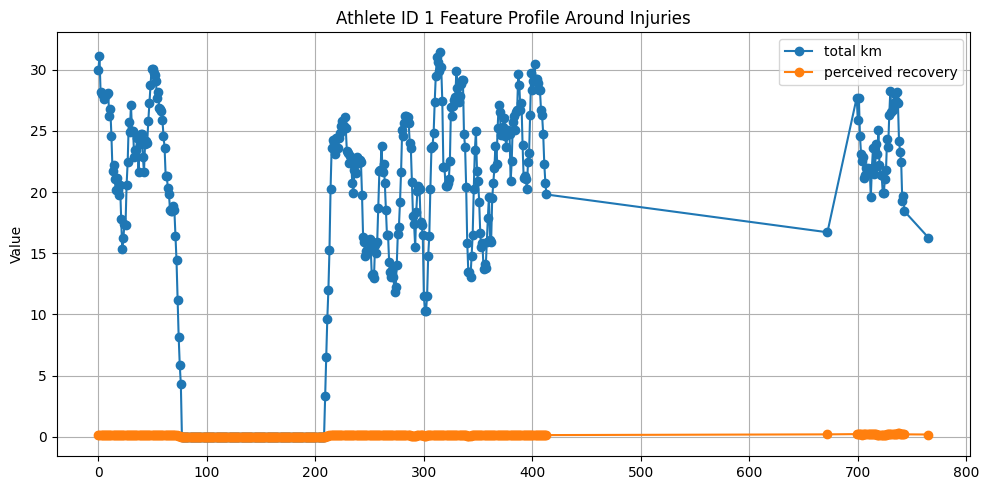

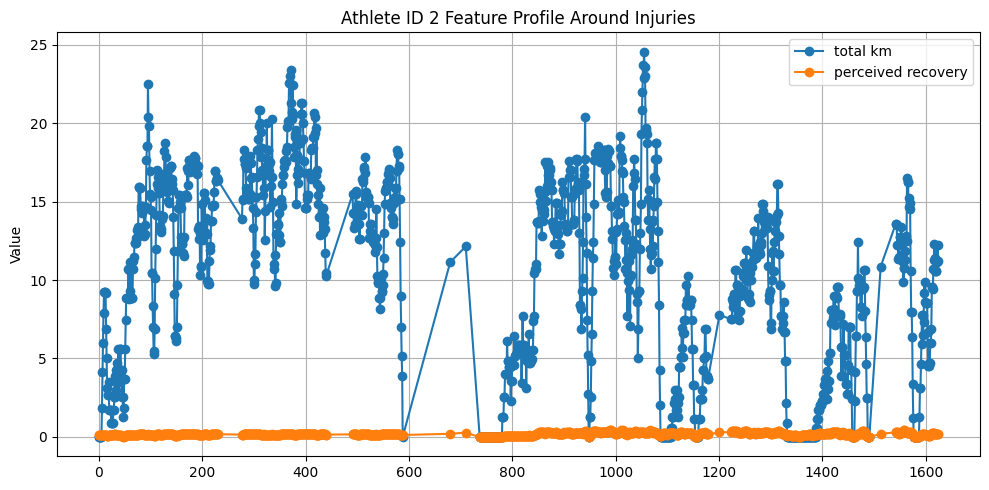

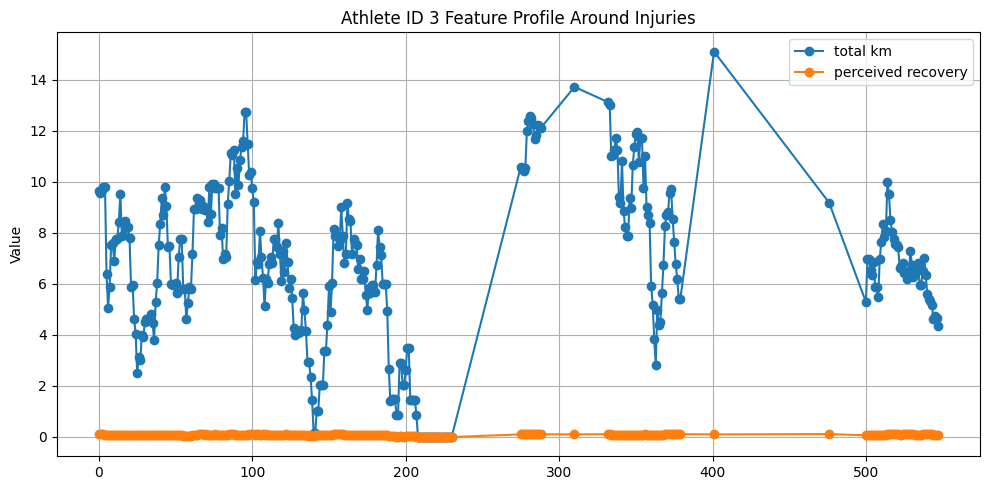

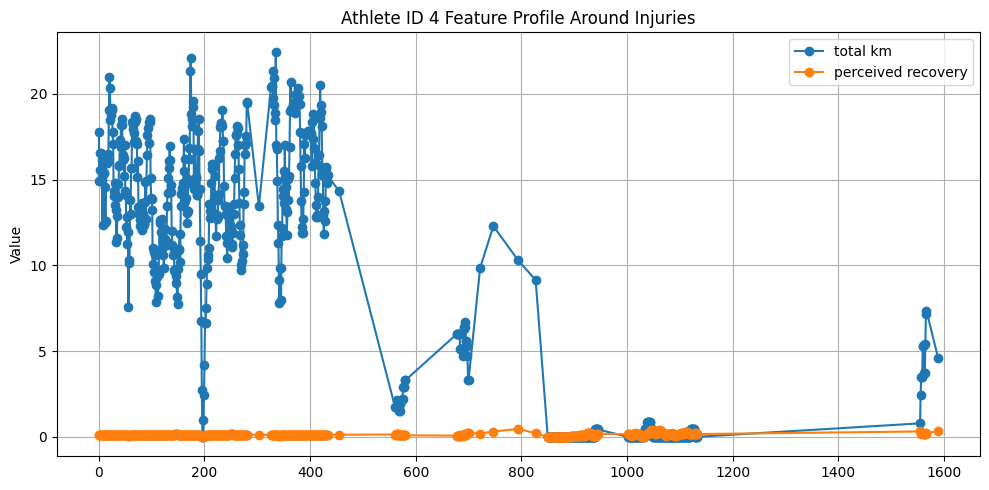

In [16]:
injured_ids = df[df['injury'] == 1]['Athlete ID'].unique()[:5]  # first 5 athletes with injuries
for aid in injured_ids:
    athlete_data = df[df['Athlete ID'] == aid].sort_values('Date')
    fig, ax = plt.subplots(figsize=(10, 5))
    for feature in ['total km', 'perceived recovery']:
        y = athlete_data[[f"{feature}" if i == 0 else f"{feature}.{i}" for i in range(7)]].mean(axis=1)
        ax.plot(athlete_data['Date'], y, marker='o', label=feature)
    ax.set_title(f'Athlete ID {aid} Feature Profile Around Injuries')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

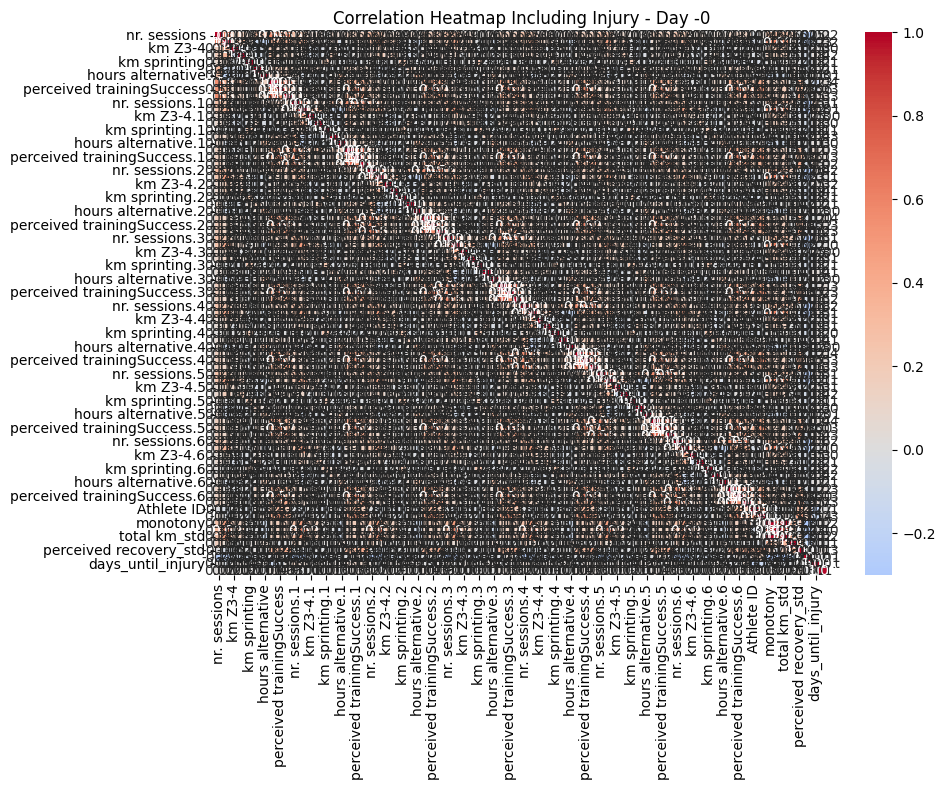

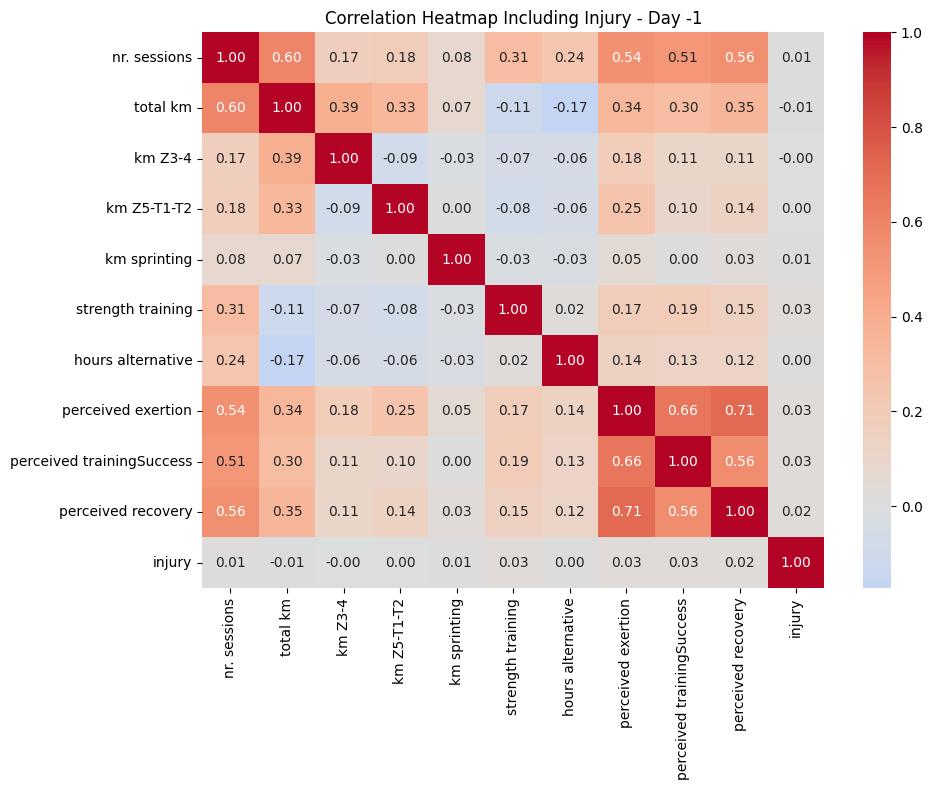

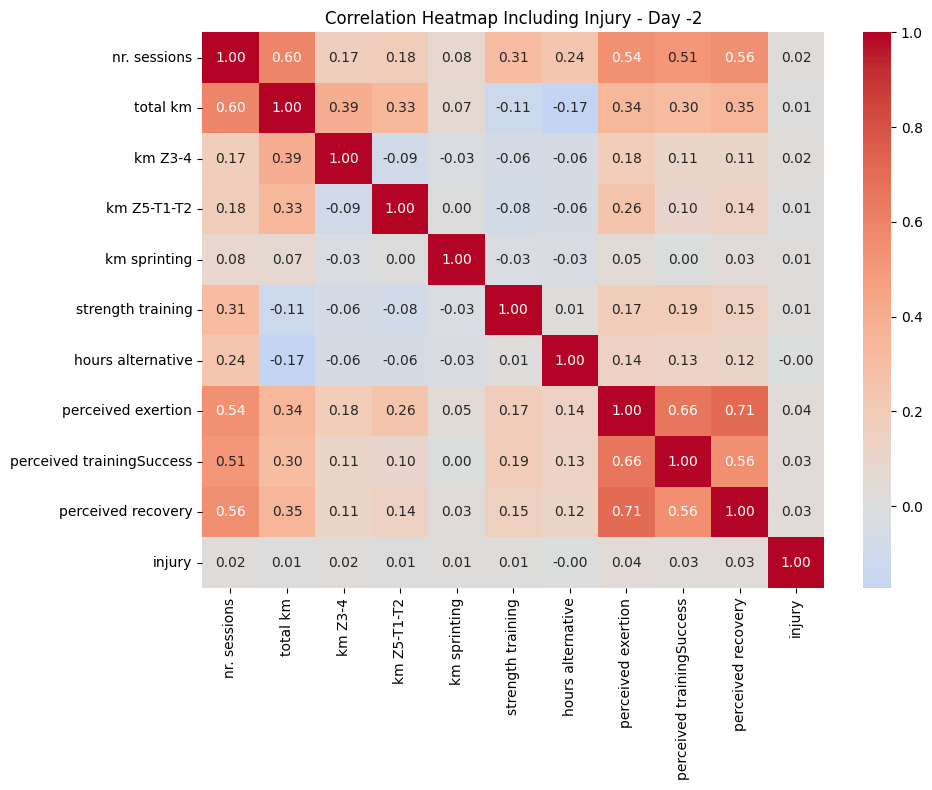

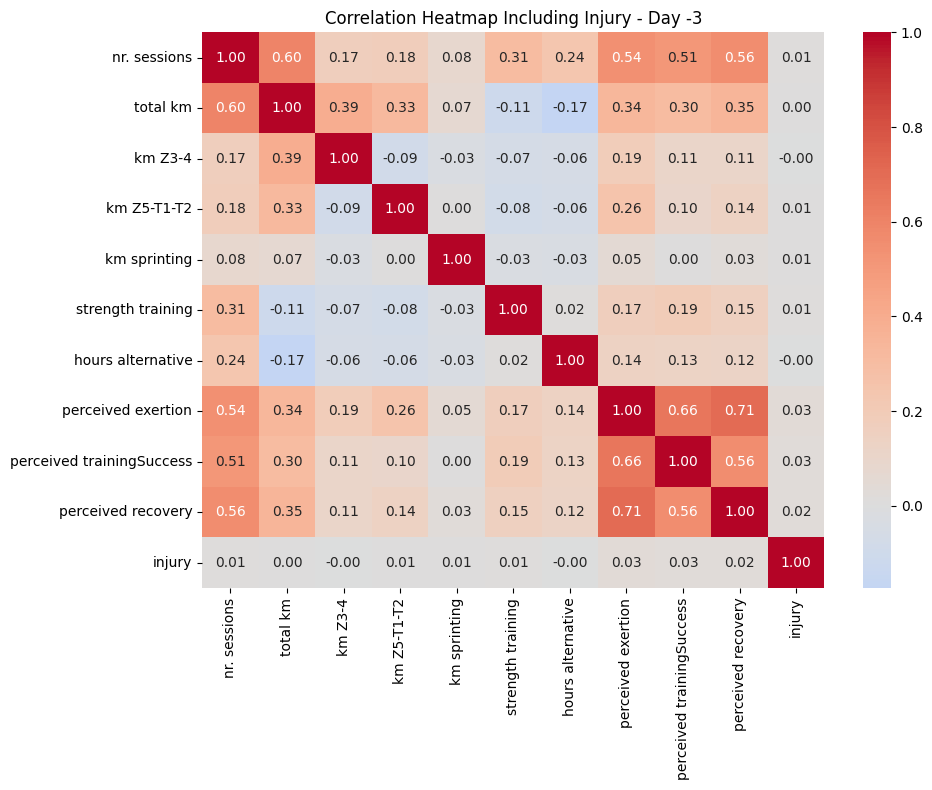

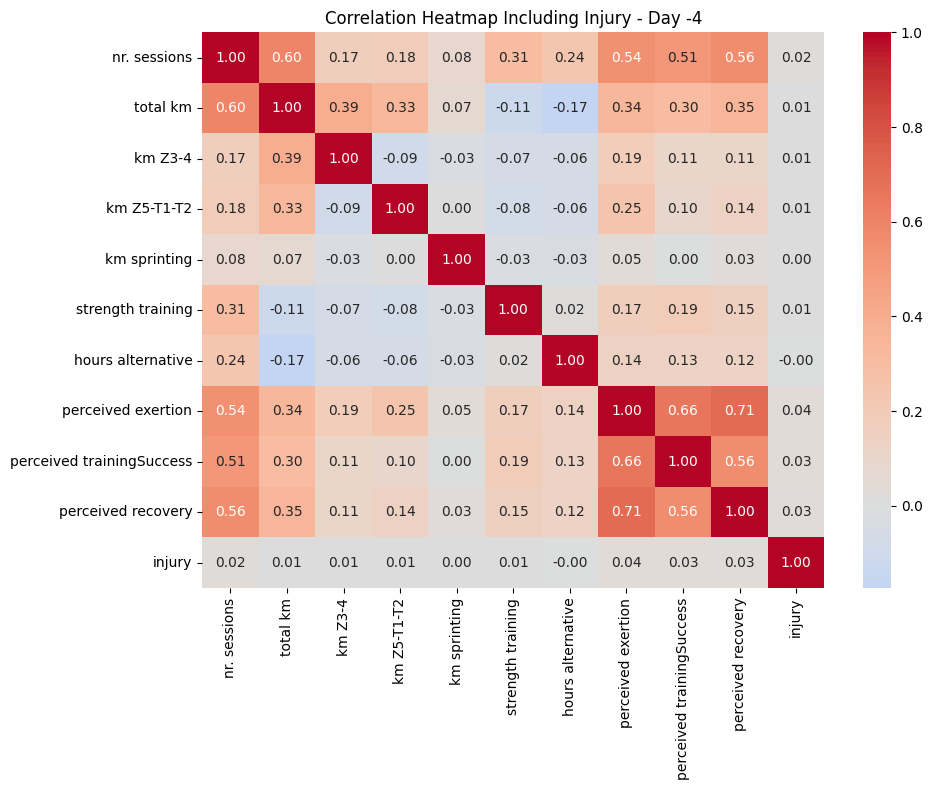

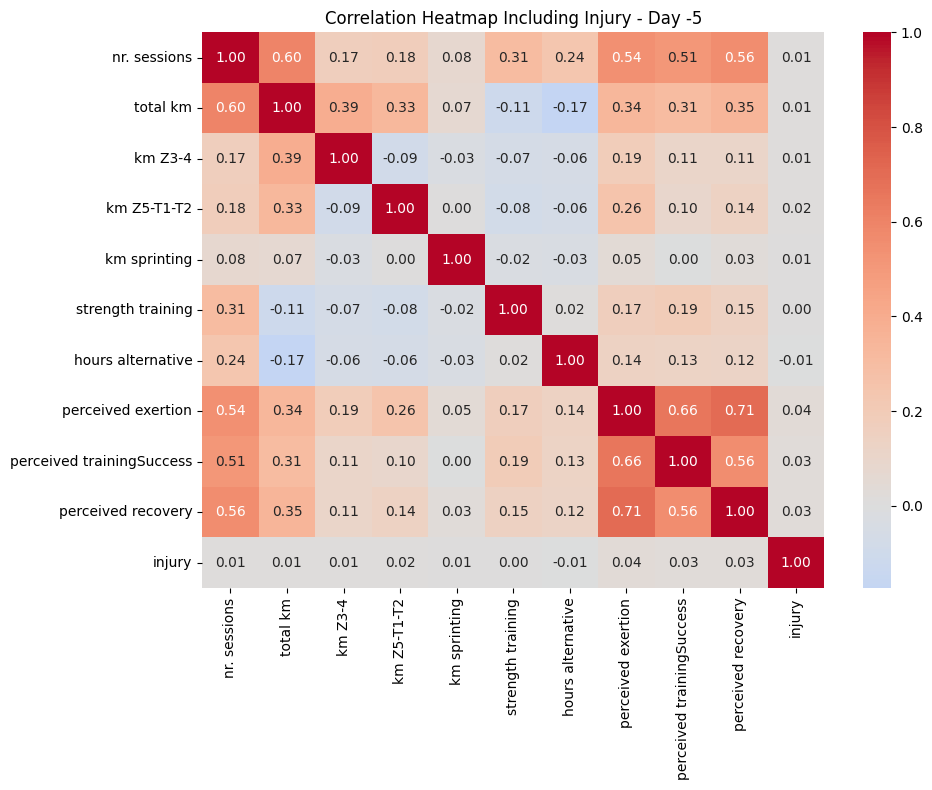

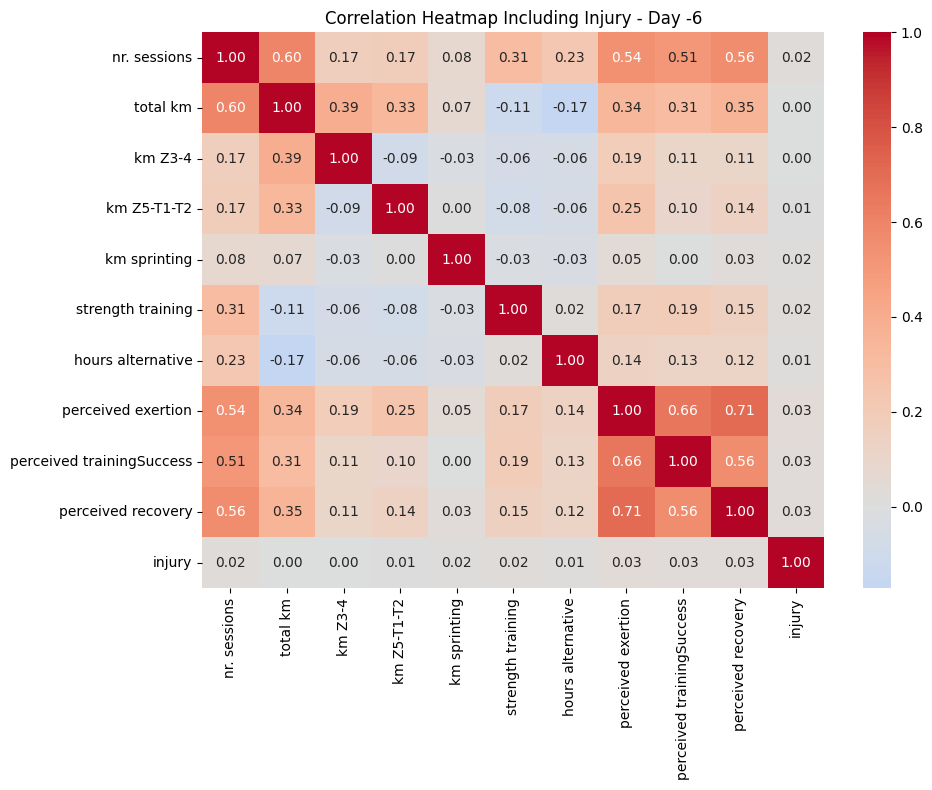

In [21]:
for i in range(7):
    suffix = "" if i == 0 else f".{i}"
    cols = [col for col in df.columns if col.endswith(suffix)]
    cols = [col for col in cols if col != f'injury{suffix}']  # just in case
    cols.append('injury')  # explicitly add the target
    df_corr = df[cols].copy()

    # Optional: rename columns for clarity
    df_corr = df_corr.rename(columns=lambda x: x.replace(suffix, '') if suffix in x else x)

    # Compute and plot correlation matrix
    corr_matrix = df_corr.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap Including Injury - Day -{i}')
    plt.tight_layout()
    plt.show()

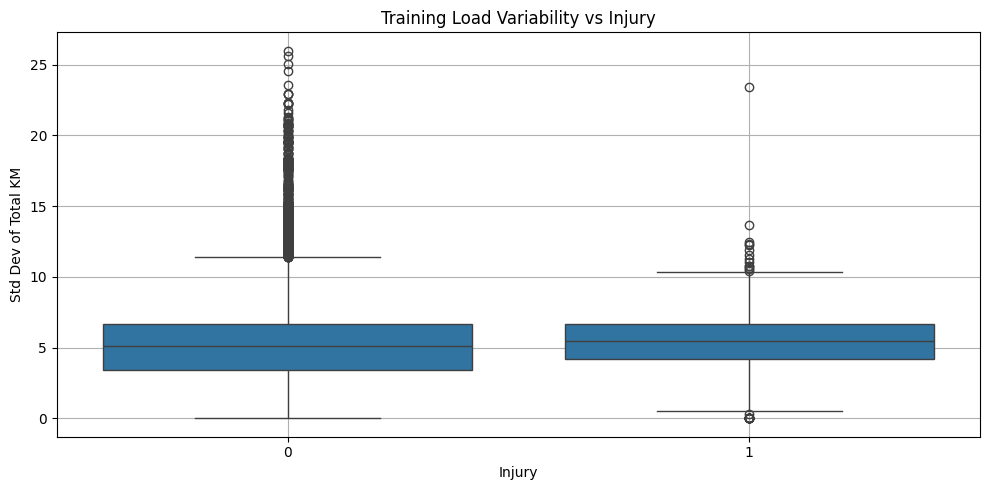

In [18]:
features = ['total km', 'nr. sessions', 'perceived recovery']
for feature in features:
    feature_cols = [f'{feature}' if i == 0 else f'{feature}.{i}' for i in range(7)]
    df[f'{feature}_std'] = df[feature_cols].std(axis=1)

# Plot boxplots of variability
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='injury', y='total km_std')
plt.title('Training Load Variability vs Injury')
plt.xlabel('Injury')
plt.ylabel('Std Dev of Total KM')
plt.grid(True)
plt.tight_layout()
plt.show()

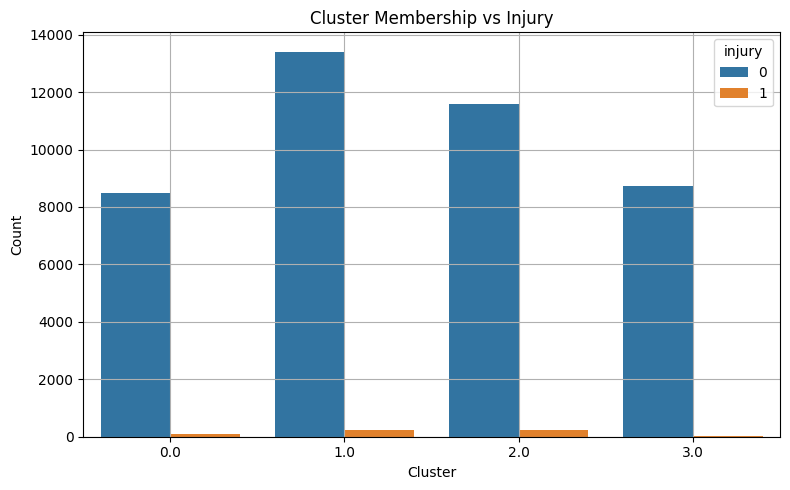

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_features = [col for col in df.columns if col not in ['Athlete ID', 'injury', 'Date']]
X_cluster = df[cluster_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
df.loc[X_cluster.index, 'cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cluster', hue='injury')
plt.title('Cluster Membership vs Injury')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

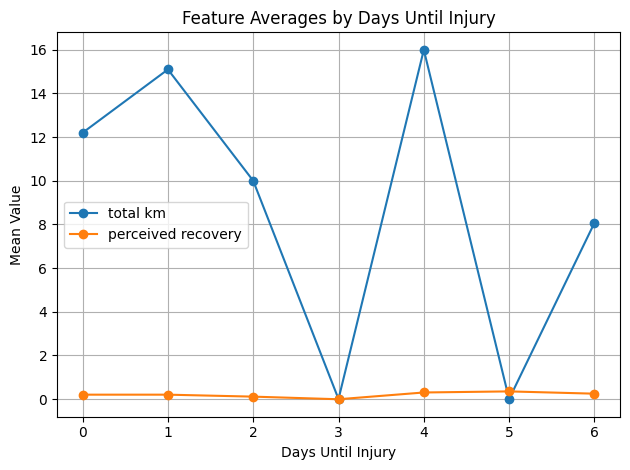

In [20]:
df['days_until_injury'] = np.nan
for aid in df['Athlete ID'].unique():
    athlete_df = df[df['Athlete ID'] == aid].sort_values('Date')
    injury_indices = athlete_df[athlete_df['injury'] == 1].index
    for idx in injury_indices:
        for offset in range(7):
            if idx - offset >= athlete_df.index.min():
                df.at[idx - offset, 'days_until_injury'] = offset

# Now analyze mean features grouped by days until injury
for feature in ['total km', 'perceived recovery']:
    plot_df = df.groupby('days_until_injury')[feature].mean().dropna()
    plt.plot(plot_df.index, plot_df.values, marker='o', label=feature)

plt.title("Feature Averages by Days Until Injury")
plt.xlabel("Days Until Injury")
plt.ylabel("Mean Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 10.6 MB/s eta 0:00:00


In [27]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

all_vif = {}
for i in range(7):
    suffix = '' if i == 0 else f'.{i}'
    features = [
        f'nr. sessions{suffix}', f'total km{suffix}', f'km Z3-4{suffix}', f'km Z5-T1-T2{suffix}',
        f'km sprinting{suffix}', f'strength training{suffix}', f'hours alternative{suffix}',
        f'perceived exertion{suffix}', f'perceived trainingSuccess{suffix}', f'perceived recovery{suffix}'
    ]
    X = df[features]
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
    all_vif[f'Day -{i}'] = vif

# Print or review
for day, vif_df in all_vif.items():
    print(f"\n==== {day} ====")
    print(vif_df)



==== Day -0 ====
                     Feature       VIF
0               nr. sessions  8.768932
1                   total km  5.523806
2                    km Z3-4  1.453227
3                km Z5-T1-T2  1.436602
4               km sprinting  1.045465
5          strength training  1.606237
6          hours alternative  1.493134
7         perceived exertion  5.508846
8  perceived trainingSuccess  3.650725
9         perceived recovery  4.616235

==== Day -1 ====
                       Feature       VIF
0               nr. sessions.1  8.738183
1                   total km.1  5.496997
2                    km Z3-4.1  1.450877
3                km Z5-T1-T2.1  1.433587
4               km sprinting.1  1.044826
5          strength training.1  1.606235
6          hours alternative.1  1.492601
7         perceived exertion.1  5.526317
8  perceived trainingSuccess.1  3.655628
9         perceived recovery.1  4.633236

==== Day -2 ====
                       Feature       VIF
0               nr. sessi